In [2]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.append('src/')

import vae
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [3]:
def generate_data():
    n = 1000
    p = 20
    
    f = np.sin
    
    x = np.linspace(0,2*np.pi,p)
    shift = np.random.normal(loc = 0.0, scale = 1, size = (n,1))
    
    data = f(x + shift)
    
    return shuffle(data, shift, random_state=0) 

def add_noise(data):
    (n,p) = data.shape
    return data + np.random.normal(loc = 0.0, scale = 1, size = (n,p))



data, shift = generate_data()

noise_data = add_noise(data)

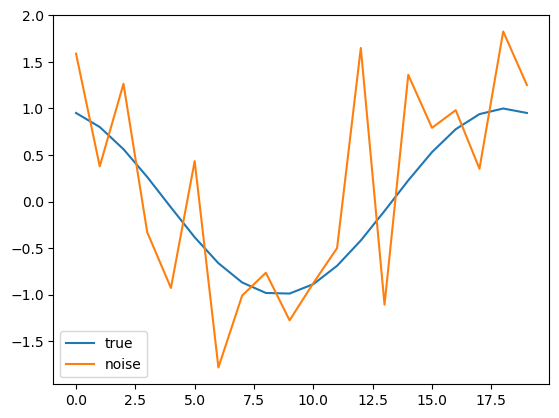

In [4]:
index = np.random.randint(0,len(data))

plt.plot(data[index], label = 'true')
plt.plot(noise_data[index], label = 'noise')
plt.legend()
plt.show()

In [5]:
input_dim = noise_data.shape[1]

model = vae.VAE(input_dim = input_dim)
model.compile(optimizer = 'adam')
model.fit(noise_data, batch_size = 32, epochs = 10, verbose = 0)

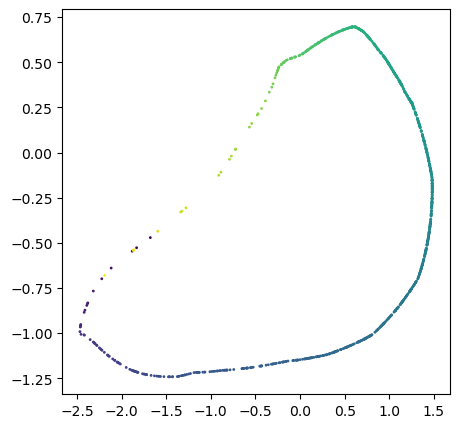

In [6]:
plt.figure(figsize = (5,5))
encoded_data = model.encoder.predict(data)[0]
plt.scatter(encoded_data[:,0],encoded_data[:,1],c = shift, s = 1)
plt.show()

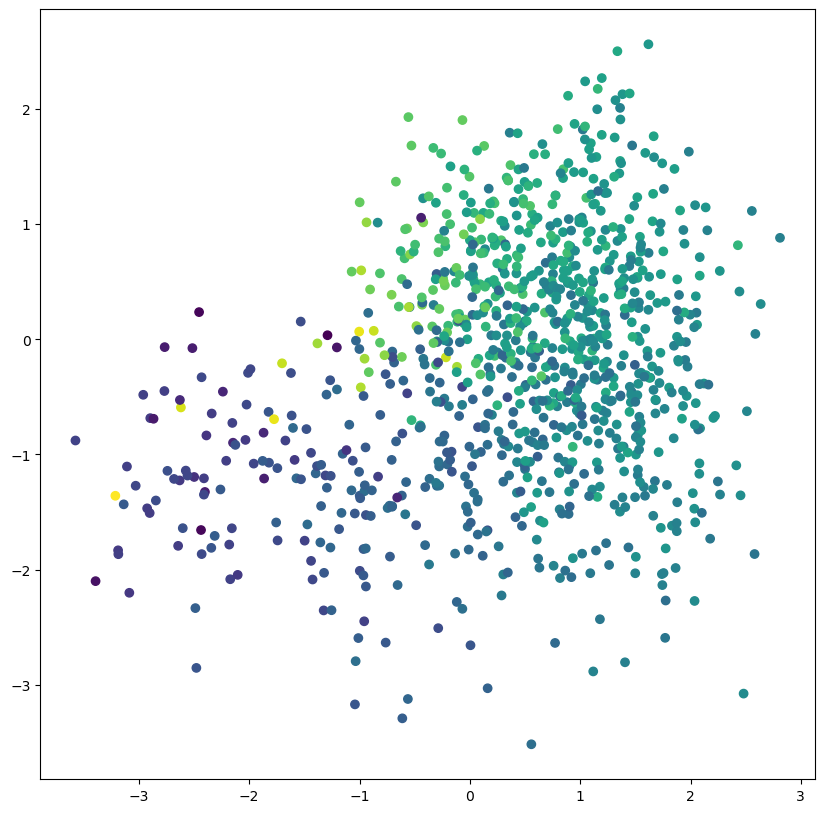

In [7]:
plt.figure(figsize = (10,10))
encoded_data = model.encoder.predict(noise_data)[0]
plt.scatter(encoded_data[:,0],encoded_data[:,1],c = shift)
plt.show()

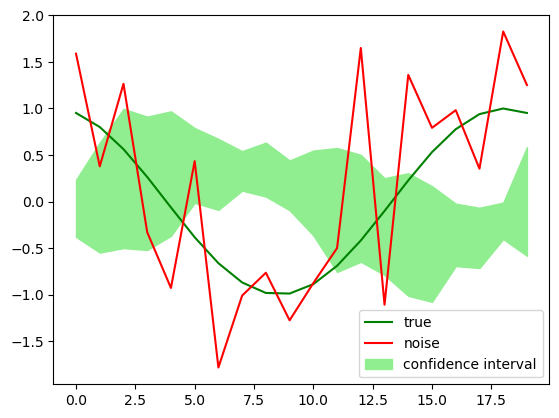

In [8]:
plt.plot(data[index],label = 'true', c = 'g')
plt.plot(noise_data[index], label = 'noise', c = 'r')


z = model.encoder.predict(data[index] + np.zeros((100,1)))[2]
reconstructions = np.sort(model.decoder.predict(z),axis = 0)
min,max = reconstructions[0],reconstructions[-1]                

plt.fill_between(np.arange(0,len(data[index])),min,max, color = 'lightgreen', label = 'confidence interval')
plt.legend()
plt.show()